# Investigate The Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
    This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user
    ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.
### Questions that we could ask:-
    1.Movies which had most and least profit.
    2.Movies with largest and lowest budgets
    3.Movies with most and least earned revenue.
    4.Movies with longest and shortest runtime values
    5.Which year we had most no.of profitable movies.
    6.Successful genres. 
    7.Most frequent Actor/Actress.
    8.Average duration of the movie. 

### Libraries i will use:
    1- Pandas: To easy use mathimatical functions with array data forms.
    2- Numpy: To use the data structure to easy manipulate with tables.
    3- matplotlib: To plot our insights.
    4- seaborn: For more advanced visualizaton.

## Data Wrangling

In [149]:
# first we import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [150]:
# using Pandas we read dataset
df = pd.read_csv('tmdb-movies.csv')
rows, col = df.shape
print(f'The dataset has {rows-1} rows and {col} columns')

The dataset has 10865 rows and 21 columns


In [151]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Cleaning data:-
   - After reviewing our dataset we will start with deleting columns we don't need like (id, imdb_id, homepage, etc) and will check for duplicating and missing values.

In [152]:
# check for duplicates
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [153]:
# we will remove it
df.drop([2090], axis = 0, inplace = True)

#check again
df.duplicated().sum()

0

Done!


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

So we have a 21 columns some of them will not need them so we will drop them.

In [155]:
# Deleting unusefull columns
del_colo = ['id', 'imdb_id', 'homepage','tagline', 'keywords', 'overview', 'budget_adj','revenue_adj']
df.drop(del_colo, axis = 1, inplace = True)
row, col = df.shape
print(f'Now we have {col} columns instead of 21 columns and {row} rows.')

Now we have 13 columns instead of 21 columns and 10865 rows.


In [156]:
# check for null value
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [157]:
# Droping those nulls
df.dropna(inplace = True)

Next step we will convert zero values in columns budget and revenue to NAN values so we can drop them too.

In [158]:
# Droping budget and revenue with 0 vlaues
budget_revenue = ['budget', 'revenue']
df[budget_revenue] = df[budget_revenue].replace(0, np.NAN)
df.dropna(subset = budget_revenue, inplace = True)
df.shape

(3805, 13)

In [159]:
# checking again for null
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [160]:
# Showing describtive data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


I noticed that min runtime is 0 so i will dive deep. 

The movies in dataset is from 1960 till 2015.

The mean runtime is 102 minutes.

The max revenue is $2,781,505,847.


In [161]:
# Converting release date
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


## Lets answering some questions

In [162]:
# highest and least profit
# but first we will create a new column for profit

df.insert(3, 'profit', df['revenue'] - df['budget'])
df.head()

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [163]:
# Making a function to calculate high and low
def cal(column):
    #highest profit:
    high = df[column].idxmax()
    high = pd.DataFrame(df.loc[high])
    
    #lowest
    low = df[column].idxmin()
    low = pd.DataFrame(df.loc[low])
    
    #collecting data
    result = pd.concat([high, low], axis = 1)
    
    return result

In [164]:
# Calculating highest and lowest profit
cal('profit')

,1386,2244
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
profit,2544505847.0,-413912431.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


In [165]:
print(f"So the highest profit is Avatar with a profit ${df.profit.max():,}.\n The least one is The Warrior's Way with a profit ${df.profit.min():,}.")

So the highest profit is Avatar with a profit $2,544,505,847.0.
 The least one is The Warrior's Way with a profit $-413,912,431.0.


In [166]:
# Highest and least revenue
cal('revenue')

,1386,5067
popularity,9.432768,0.462609
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
profit,2544505847.0,-5999998.0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


In [167]:
print(f"So the highest revenue is Avatar with a revenue ${df.revenue.max():,}.\nThe least one is Shattered Glass with a revenue ${df.revenue.min():,}.")

So the highest revenue is Avatar with a revenue $2,781,505,847.0.
The least one is Shattered Glass with a revenue $2.0.


In [168]:
cal('budget')

,2244,2618
popularity,0.25054,0.090186
budget,425000000.0,1.0
revenue,11087569.0,100.0
profit,-413912431.0,99.0
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


In [169]:
print(f"So the highest budget is The Warrior's Way with a Total ${df.budget.max():,}.\nThe least one is Lost & Found with a budget ${df.budget.min():,}.")

So the highest budget is The Warrior's Way with a Total $425,000,000.0.
The least one is Lost & Found with a budget $1.0.


In [170]:
cal('runtime')

,2107,5162
popularity,0.534192,0.208637
budget,18000000.0,10.0
revenue,871279.0,5.0
profit,-17128721.0,-5.0
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C


In [171]:
print(f"So the highest runtime is Carlos with  Total minutes {df.runtime.max():,}.\nThe least one is Kid's Story with a runtime {df.runtime.min():,}.")

So the highest runtime is Carlos with  Total minutes 338.
The least one is Kid's Story with a runtime 15.


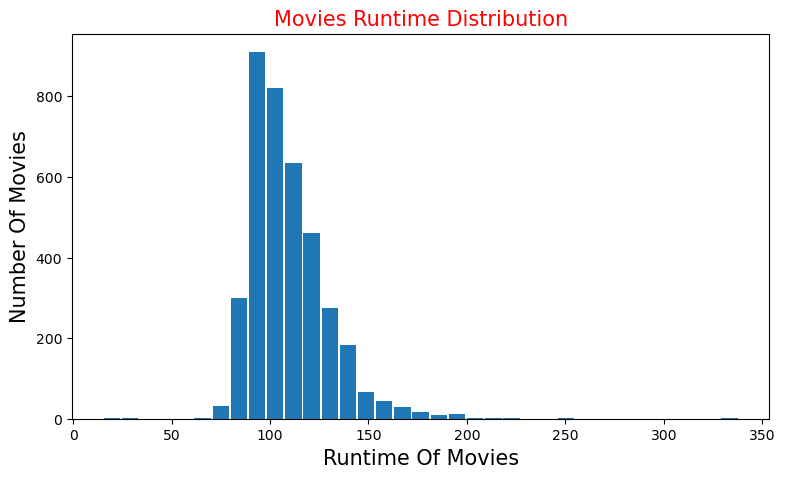

In [172]:
# showing histogram for runtime column using matblotlib library
plt.figure(figsize = (9,5))
plt.xlabel("Runtime Of Movies", fontsize = 15)
plt.ylabel('Number Of Movies', fontsize = 15)
plt.title('Movies Runtime Distribution', color = 'red', fontsize = 15)
plt.hist(df['runtime'], rwidth = 0.9, bins = 35)
plt.show()

The histogram above showing the distribution of runtime which is Right skewed, Most of movies runtime between 80 minutes and 120 minutes.

Lets look at the most profitable Year.

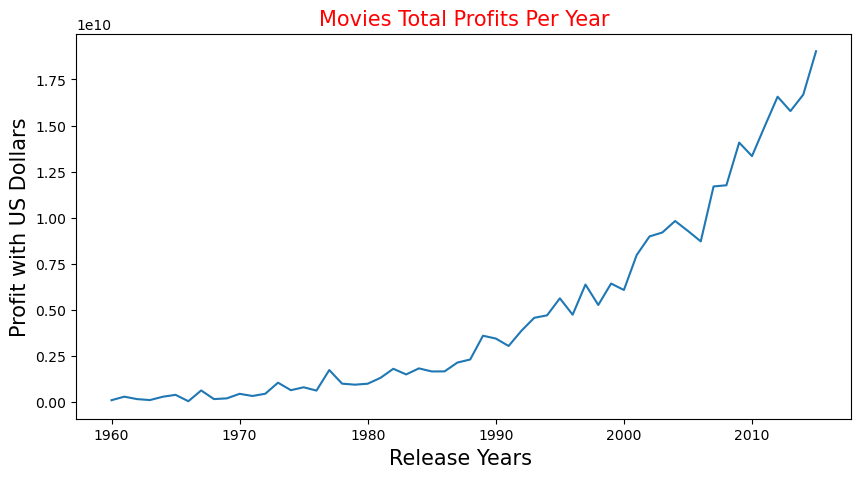

In [173]:
# Grouping year with total profits for every year
profit_year = df.groupby('release_year')['profit'].sum()

# Ploting the result
plt.figure(figsize = (10,5))
plt.xlabel("Release Years ", fontsize = 15)
plt.ylabel('Profit with US Dollars', fontsize = 15)
plt.title('Movies Total Profits Per Year', color = 'red', fontsize = 15);
plt.plot(profit_year)
plt.show()

In [174]:
profit_year.idxmax()


2015

Through years profit has increased, The highest profitable year is 2015

Now lets look for succesful genres.

But there is alot of work to do, we need first to seperate genres.


In [175]:
# Creating a function to seperate str using Pandas series 

def sep(column):
    sep_column = df[column].str.cat(sep = '|')
    sep_column = pd.Series(sep_column.split('|'))
    
    # sorting value from big to small
    data = sep_column.value_counts(ascending = False)

    return data

In [176]:
genres = sep('genres')
genres

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64

Let's visulize the result.


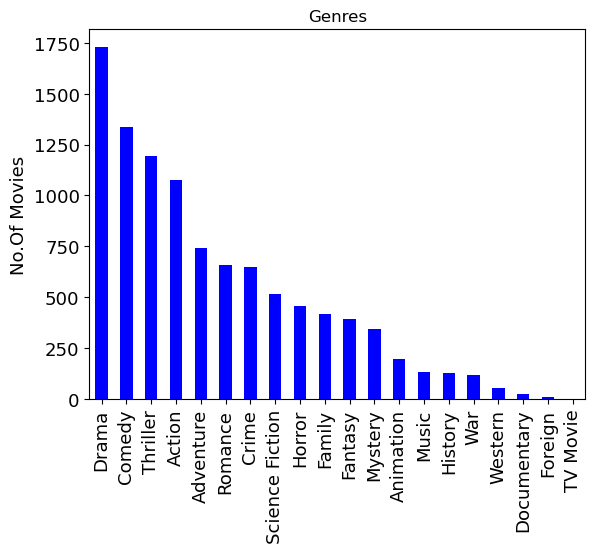

In [177]:
# Using bar plot
visual = genres.plot.bar(color = 'blue', fontsize = 13)

visual.set(title = 'Number Of Movies Per Genres')
visual.set_ylabel('No.Of Movies', fontsize = 13);


The Darama genre is the highest genre with 1729 movies.

In [178]:
director = sep('director')
director.head()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
dtype: int64

Steven Spielberg has directed 28 movies.

WOW!

In [179]:
a = df.groupby('director')['vote_average'].mean()
a.sort_values(ascending = False)

director
Damien Chazelle      8.200000
Tony Kaye            8.000000
Xavier Dolan         8.000000
Lenny Abrahamson     8.000000
Morten Tyldum        8.000000
                       ...   
Dick Maas            3.700000
Joseph Sargent       3.700000
Luca Bercovici       3.600000
Uwe Boll             3.566667
Lawrence Kasanoff    2.200000
Name: vote_average, Length: 1683, dtype: float64

In [180]:
sep('cast')


Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
                     ..
Katrina Bowden        1
Jean-Luc Bilodeau     1
Natasha Calis         1
Madison Davenport     1
Raquel Welch          1
Length: 6747, dtype: int64

In [181]:
actor = sep('cast').sort_values(ascending = False)
a = actor[:10]

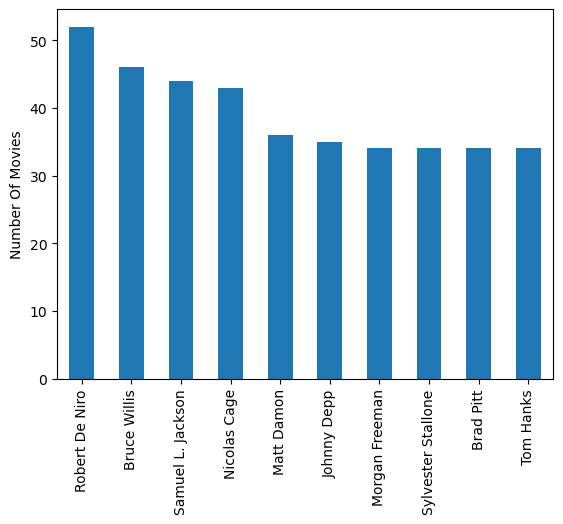

In [189]:
a.plot.bar();
plt.ylabel('Number Of Movies');

Top 10 Actor/Actress according to number of apperance.

In [183]:
# Top 10 movies
def top_10(column):
    movies = pd.DataFrame(df[column].sort_values(ascending = False))[:10]
    movies['original_title'] = df['original_title']

    plt.figure(figsize=(12,6))
    plt.xlabel(column.capitalize())
    plt.ylabel('')
    x = input('Please enter chart title: ')
    plt.title(x , color = 'red')
    sns.barplot(x = column, y = 'original_title', data = movies);

Please enter chart title: Top 10 Profitable Movies!


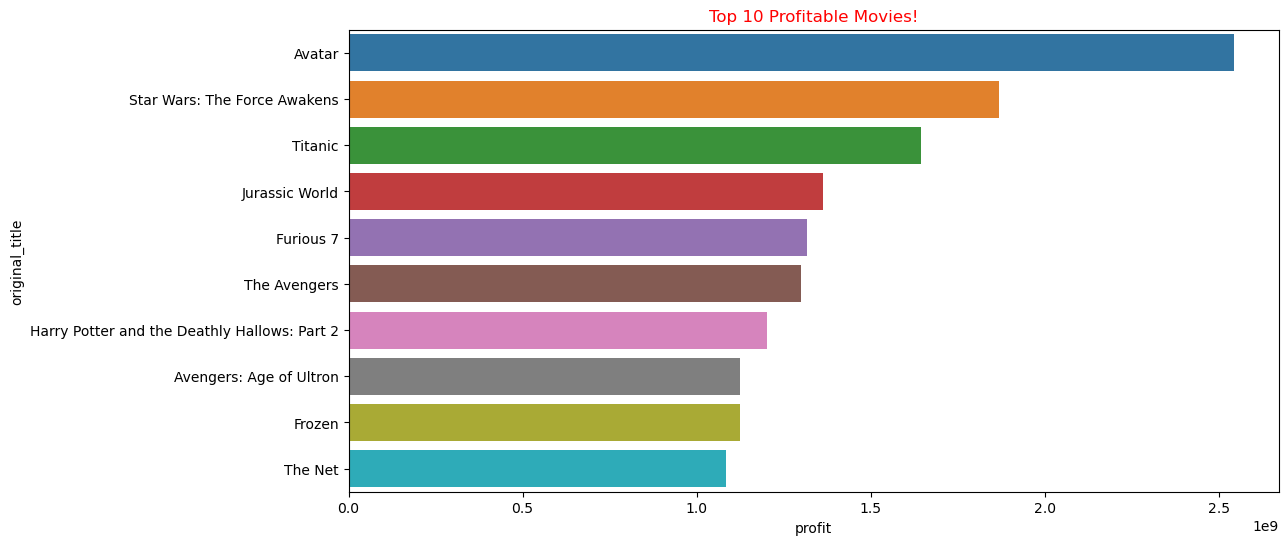

In [184]:
top_10('profit')

Top 10 profitable movies.

Please enter chart title: Top 10 Movies According To Budget!


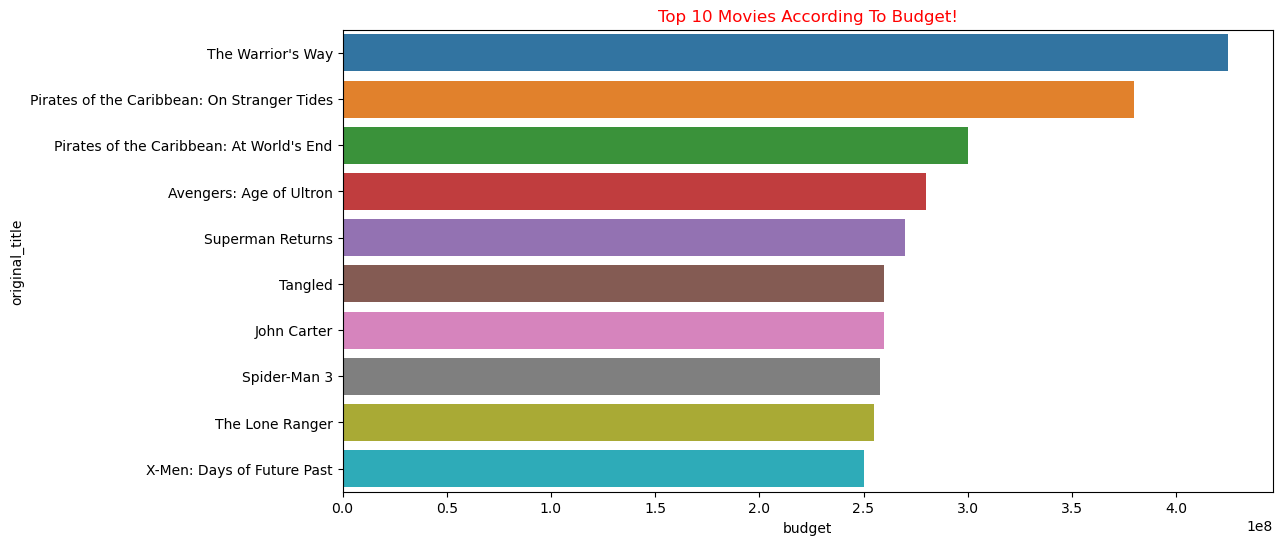

In [185]:
top_10('budget')

Please enter chart title: Top 10 Ranked Movies!


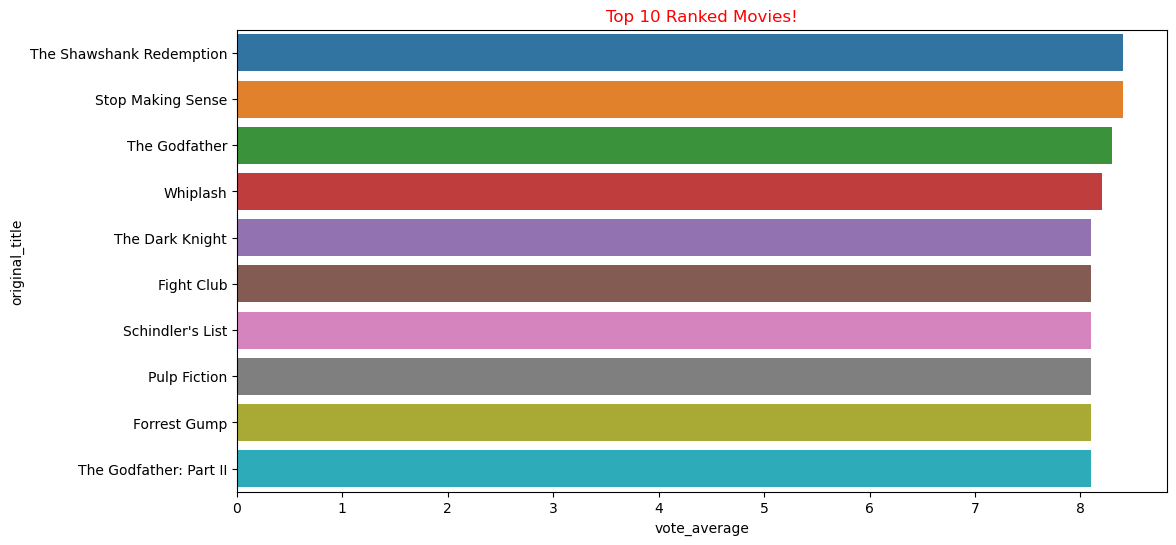

In [186]:
top_10('vote_average')

From our analysis you don't need to produce a movie with a big budget to get a big profit!